# Analyse BDD consolidee des points de distribution


In [1]:
# Configuration globale
import pandas
import geopandas
# Pour recharger automatiquement le code externe au notebook
%load_ext autoreload
%autoreload 2

from IPython.display import display
#
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', 2)


# Base OSM BPE SIRENE

In [5]:
a = pandas.read_csv('./resultats/base_commerces/commerces_crater.csv', sep=';',
                    dtype={
                        'id_commune': str,
                        'id_departement': str,
                        'id_region': str
                    })
a.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222679 entries, 0 to 222678
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id_region                222561 non-null  object 
 1   id_departement           222561 non-null  object 
 2   id_commune               222013 non-null  object 
 3   nom_commerce             210384 non-null  object 
 4   code_type_commerce       222679 non-null  object 
 5   libelle_type_commerce    222679 non-null  object 
 6   qualite_geolocalisation  142326 non-null  object 
 7   longitude                222679 non-null  float64
 8   latitude                 222679 non-null  float64
 9   source                   222679 non-null  object 
 10  id_commerce              222013 non-null  object 
 11  id_commerce_osm          58796 non-null   object 
 12  doublon_a_supprimer      58796 non-null   object 
dtypes: float64(2), object(11)
memory usage: 22.1+ MB


/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (6,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
# Exclusion des DROMs
a_metro = a[~a['id_departement'].str[2:2].isin(['96', '97', '98', 'co'])]

# Points venant de OSM par type dans base OSM+BPE+SIRENE

code_type_commerce     nb
0      BOULANGERIE_PATISSERIE  26880
1  GRANDE_SURFACE_GENERALISTE  18079
2  PETITE_SURFACE_GENERALISTE  17165
3         COMMERCE_SPECIALISE  16354
4                       AUTRE   2439

<AxesSubplot:xlabel='code_type_commerce'>

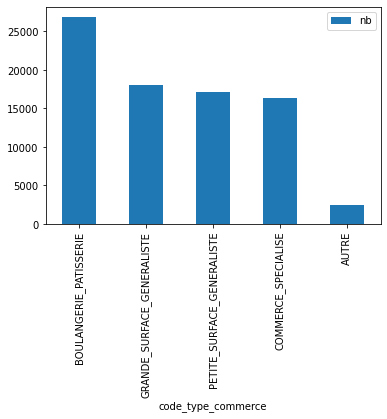

In [7]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    osm_counts = a_metro.loc[a_metro['source']=='OSM',:].code_type_commerce.value_counts().reset_index().rename(columns={'index':'code_type_commerce', 'code_type_commerce':'nb'})
    # osm_counts = osm_counts.reindex([0, 2, 1, 3, 4, 5])
    display(osm_counts)

osm_counts.plot.bar(x='code_type_commerce')

# Points venant de BPE par type dans base OSM+BPE+SIRENE

code_type_commerce     nb
0  PETITE_SURFACE_GENERALISTE  23829
1      BOULANGERIE_PATISSERIE  23165
2         COMMERCE_SPECIALISE  15837
3  GRANDE_SURFACE_GENERALISTE   5276

<AxesSubplot:xlabel='code_type_commerce'>

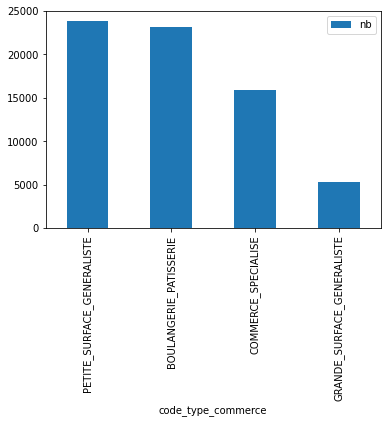

In [8]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    bpe_counts = a_metro.loc[a_metro['source']=='BPE',:].code_type_commerce.value_counts().reset_index().rename(columns={'index':'code_type_commerce', 'code_type_commerce':'nb'})
#    bpe_counts = bpe_counts.reindex([0, 2, 1, 3, 4, 5])
    display(bpe_counts)

bpe_counts.plot.bar(x='code_type_commerce')

# Points venant de SIRENE par type dans base OSM+BPE+SIRENE

code_type_commerce     nb
0               BOUL  48295
1               EPIC  30593
2              AUTRE  22586
3               SUPM  21384
4               BOUC  17643
5               SUPE   5710
6               POIS   2878
7               HYPE   1817
8               SURG   1679

<AxesSubplot:xlabel='code_type_commerce'>

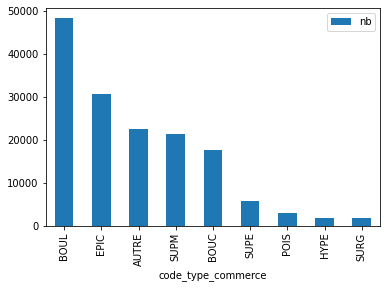

In [27]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    sirene_counts = a_metro.loc[a_metro['source']=='SIRENE',:].code_type_commerce.value_counts().reset_index().rename(columns={'index':'code_type_commerce', 'code_type_commerce':'nb'})
    # sirene_counts = sirene_counts.reindex([0, 2, 1, 3, 4, 5])
    display(sirene_counts)

sirene_counts.plot.bar(x='code_type_commerce')


# Base OSM+BPE

In [38]:
c = pandas.read_csv('resultats/base_commerces/commerces_crater_osm_bpe.csv', sep=';',
                    dtype={
                        'id_commune': str,
                        'id_departement': str,
                        'id_region': str
                    })
c.info(verbose=True)

# Exclusion des DROMs
c_metro = c[~c['id_departement'].str[0:2].isin(['96', '97', '98', 'co'])]
# Exclusion des commerces BPE qui ont été rapproché de OSM
d = c_metro.loc[c_metro['id_commerce_osm'].isna()]
d1 = c_metro.loc[~ (c_metro.doublon_a_supprimer == True), :]

/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212104 entries, 0 to 212103
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id_region                211986 non-null  object 
 1   id_departement           211986 non-null  object 
 2   id_commune               211438 non-null  object 
 3   nom_commerce             199814 non-null  object 
 4   code_type_commerce       212104 non-null  object 
 5   libelle_type_commerce    212104 non-null  object 
 6   qualite_geolocalisation  131764 non-null  object 
 7   longitude                212104 non-null  float64
 8   latitude                 212104 non-null  float64
 9   source                   212104 non-null  object 
 10  id_commerce              211438 non-null  object 
 11  id_commerce_osm          53387 non-null   object 
 12  doublon_a_supprimer      53387 non-null   object 
dtypes: float64(2), object(11)
memory usage: 21.0+ MB


# Points venant de OSM par type dans base OSM+BPE

code_type_commerce     nb
0               BOUL  26127
1               SUPM  17405
2               SUPE  15731
3               BOUC   8114
4              AUTRE   7885
5               POIS   1261
6               SURG    985

<AxesSubplot:xlabel='code_type_commerce'>

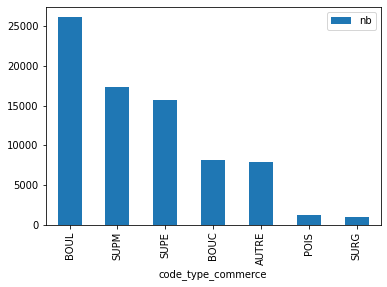

In [32]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    osm_counts = d.loc[d['source']=='OSM',:].code_type_commerce.value_counts().reset_index().rename(columns={'index':'code_type_commerce', 'code_type_commerce':'nb'})
    # osm_counts = osm_counts.reindex([0, 2, 1, 3, 4, 5])
    display(osm_counts)

osm_counts.plot.bar(x='code_type_commerce')

# Points venant de BPE par type dans base OSM+BPE

code_type_commerce     nb
0               EPIC  28895
1               BOUL  22413
2               BOUC  13621
3               SUPM   4211
4               SUPE   3485
5               POIS   2247
6               HYPE   1919
7               SURG    894

<AxesSubplot:xlabel='code_type_commerce'>

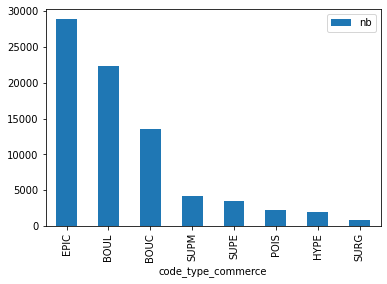

In [33]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    bpe_counts = d.loc[d['source']=='BPE',:].code_type_commerce.value_counts().reset_index().rename(columns={'index':'code_type_commerce', 'code_type_commerce':'nb'})
#    bpe_counts = bpe_counts.reindex([0, 2, 1, 3, 4, 5])
    display(bpe_counts)

bpe_counts.plot.bar(x='code_type_commerce')

# Vue globale par type dans base OSM+BPE

code_type_commerce     nb
0               BOUL  48540
1               EPIC  28895
2               BOUC  21735
3               SUPM  21616
4               SUPE  19216
5              AUTRE   7885
6               POIS   3508
7               HYPE   1919
8               SURG   1879

<AxesSubplot:xlabel='code_type_commerce'>

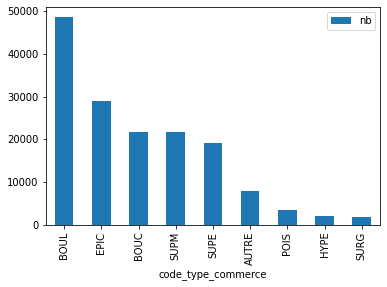

In [34]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    all_counts = d.code_type_commerce.value_counts().reset_index().rename(columns={'index':'code_type_commerce', 'code_type_commerce':'nb'})
#    bpe_counts = bpe_counts.reindex([0, 2, 1, 3, 4, 5])
    display(all_counts)

all_counts.plot.bar(x='code_type_commerce')




# Nombre de commerces par ville vus par OSM+BPE

In [6]:
print(f'Nombre de commerces OSM+BPE vus à Blagnac(31069) = {d[d.id_commune == "31069"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Bel Air Val d Ance(48083) = {d[d.id_commune == "48038"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Nevez(29153) = {d[d.id_commune == "29153"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Pont-Aven(29217) = {d[d.id_commune == "29217"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Roche Saint Secret Beconne(26276) = {d[d.id_commune == "26276"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Dieulefit(26114) = {d[d.id_commune == "26114"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Le Poet Laval(26243) = {d[d.id_commune == "26243"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Narbonne(11262) = {d[d.id_commune == "11262"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Balma(31044) = {d[d.id_commune == "31044"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Talence(33522) = {d[d.id_commune == "33522"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Nesle(80585) = {d[d.id_commune == "80585"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Hombleux(80442) = {d[d.id_commune == "80442"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Villeurbanne(69266) = {d[d.id_commune == "69266"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Rouen(76540) = {d[d.id_commune == "76540"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Coueron(44047) = {d[d.id_commune == "44047"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Brax(31088) = {d[d.id_commune == "31088"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Pibrac(31417) = {d[d.id_commune == "31417"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Leguevin(31291) = {d[d.id_commune == "31291"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Cournon d Auvergne(63124) = {d[d.id_commune == "63124"].shape[0]}')

Nombre de commerces OSM+BPE vus à Blagnac(31069) = 48
Nombre de commerces OSM+BPE vus à Bel Air Val d Ance(48083) = 2
Nombre de commerces OSM+BPE vus à Nevez(29153) = 11
Nombre de commerces OSM+BPE vus à Pont-Aven(29217) = 16
Nombre de commerces OSM+BPE vus à Roche Saint Secret Beconne(26276) = 3
Nombre de commerces OSM+BPE vus à Dieulefit(26114) = 20
Nombre de commerces OSM+BPE vus à Le Poet Laval(26243) = 6
Nombre de commerces OSM+BPE vus à Narbonne(11262) = 169
Nombre de commerces OSM+BPE vus à Balma(31044) = 41
Nombre de commerces OSM+BPE vus à Talence(33522) = 63
Nombre de commerces OSM+BPE vus à Nesle(80585) = 7
Nombre de commerces OSM+BPE vus à Hombleux(80442) = 1
Nombre de commerces OSM+BPE vus à Villeurbanne(69266) = 303
Nombre de commerces OSM+BPE vus à Rouen(76540) = 368
Nombre de commerces OSM+BPE vus à Coueron(44047) = 19
Nombre de commerces OSM+BPE vus à Brax(31088) = 4
Nombre de commerces OSM+BPE vus à Pibrac(31417) = 9
Nombre de commerces OSM+BPE vus à Leguevin(31291) =

# Nombre de commerces par ville vus par OSM seule

In [7]:
e = d.loc[d.source == 'OSM']
print(f'Nombre de commerces OSM vus à Blagnac(31069) = {e[e.id_commune == "31069"].shape[0]}')
print(f'Nombre de commerces OSM vus à Bel Air Val d Ance(48083) = {e[e.id_commune == "48038"].shape[0]}')
print(f'Nombre de commerces OSM vus à Nevez(29153) = {e[e.id_commune == "29153"].shape[0]}')
print(f'Nombre de commerces OSM vus à Pont-Aven(29217) = {e[e.id_commune == "29217"].shape[0]}')
print(f'Nombre de commerces OSM vus à Roche Saint Secret Beconne(26276) = {e[e.id_commune == "26276"].shape[0]}')
print(f'Nombre de commerces OSM vus à Dieulefit(26114) = {e[e.id_commune == "26114"].shape[0]}')
print(f'Nombre de commerces OSM vus à Le Poet Laval(26243) = {e[e.id_commune == "26243"].shape[0]}')
print(f'Nombre de commerces OSM vus à Narbonne(11262) = {e[e.id_commune == "11262"].shape[0]}')
print(f'Nombre de commerces OSM vus à Balma(31044) = {e[e.id_commune == "31044"].shape[0]}')
print(f'Nombre de commerces OSM vus à Talence(33522) = {e[e.id_commune == "33522"].shape[0]}')
print(f'Nombre de commerces OSM vus à Nesle(80585) = {e[e.id_commune == "80585"].shape[0]}')
print(f'Nombre de commerces OSM vus à Hombleux(80442) = {e[e.id_commune == "80442"].shape[0]}')
print(f'Nombre de commerces OSM vus à Villeurbanne(69266) = {e[e.id_commune == "69266"].shape[0]}')
print(f'Nombre de commerces OSM vus à Rouen(76540) = {e[e.id_commune == "76540"].shape[0]}')
print(f'Nombre de commerces OSM vus à Coueron(44047) = {e[e.id_commune == "44047"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Brax(31088) = {e[e.id_commune == "31088"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Pibrac(31417) = {e[e.id_commune == "31417"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Leguevin(31291) = {e[e.id_commune == "31291"].shape[0]}')
print(f'Nombre de commerces OSM+BPE vus à Cournon d Auvergne(63124) = {e[e.id_commune == "63124"].shape[0]}')

Nombre de commerces OSM vus à Blagnac(31069) = 31
Nombre de commerces OSM vus à Bel Air Val d Ance(48083) = 0
Nombre de commerces OSM vus à Nevez(29153) = 8
Nombre de commerces OSM vus à Pont-Aven(29217) = 8
Nombre de commerces OSM vus à Roche Saint Secret Beconne(26276) = 1
Nombre de commerces OSM vus à Dieulefit(26114) = 16
Nombre de commerces OSM vus à Le Poet Laval(26243) = 2
Nombre de commerces OSM vus à Narbonne(11262) = 62
Nombre de commerces OSM vus à Balma(31044) = 27
Nombre de commerces OSM vus à Talence(33522) = 41
Nombre de commerces OSM vus à Nesle(80585) = 2
Nombre de commerces OSM vus à Hombleux(80442) = 0
Nombre de commerces OSM vus à Villeurbanne(69266) = 167
Nombre de commerces OSM vus à Rouen(76540) = 238
Nombre de commerces OSM vus à Coueron(44047) = 15
Nombre de commerces OSM+BPE vus à Brax(31088) = 3
Nombre de commerces OSM+BPE vus à Pibrac(31417) = 5
Nombre de commerces OSM+BPE vus à Leguevin(31291) = 4
Nombre de commerces OSM+BPE vus à Cournon d Auvergne(63124) 

code_type_commerce     nb
0               BOUL  50837
4               SUPE  20651
1               EPIC  31337
2               BOUC  22885
5              AUTRE   8093
6               POIS   3685
3               SUPM  22512

<AxesSubplot:xlabel='code_type_commerce'>

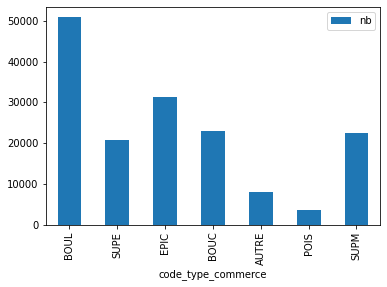

In [38]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    d_counts = d.code_type_commerce.value_counts().reset_index().rename(columns={'index':'code_type_commerce', 'code_type_commerce':'nb'})
    d_counts = d_counts.reindex([0, 4, 1, 2, 5, 6, 3])
    display(d_counts)

d_counts.plot.bar(x='code_type_commerce')

In [19]:
cournon = c[c.id_commune == "63124"]
t=c[(c.id_commerce == "BPE_BOUC_63124_1488814")]['id_commune']

In [8]:
blagnac_bpe_osm = d[d.id_commune == "31069"]
blagnac_osm = e[e.id_commune == "31069"]
cournon_bpe_osm = d[d.id_commune == "63124"]
cournon_osm = e[e.id_commune == "63124"]
pibrac_bpe_osm = d[d.id_commune == "31417"]
pibrac_osm = e[e.id_commune == "31417"]
talence_bpe_osm = d[d.id_commune == "33522"]
talence_osm = e[e.id_commune == "33522"]